<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Función transferencia de segundo orden

Por Mariano Llamedo Soria


Entendemos como sección de segundo orden a un sistema cuya transferencia está definida por un cociente de polinomios de segundo orden. Justamente, las funciones transferencia de mayor grado que estudiaremos serán de segundo orden, dado que al cascadear éstas y las de primer orden podemos representar funciones de orden arbitrario.  Para el caso concreto de un filtro pasabajo como el que analizamos en clase, la función transferencia está definida por un polinomio denominador de segundo orden, y un numerador definido por una constante. La factorización que adoptamos nos permitió obtener una función $H(s)$ en función de dos parámetros $\omega_0$ y $Q$

\begin{equation}
H(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

 Luego adoptando como norma de frecuencia $\omega_0$, obtenemos la versión normalizada en frecuencia

\begin{equation}
H(s) = \frac{1}{s^2+s\frac{1}{Q}+1}
\end{equation}

quedando como único parámetro $Q$. En la siguiente simulación se ejemplifica cómo simular una SOS, obteniendo la respuesta en frecuencia y un diagrama de polos y ceros.

In [1]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, pretty_print_bicuad_omegayq

from pytc2.general import print_subtitle


In [2]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías


<IPython.core.display.Math object>

<IPython.core.display.Math object>

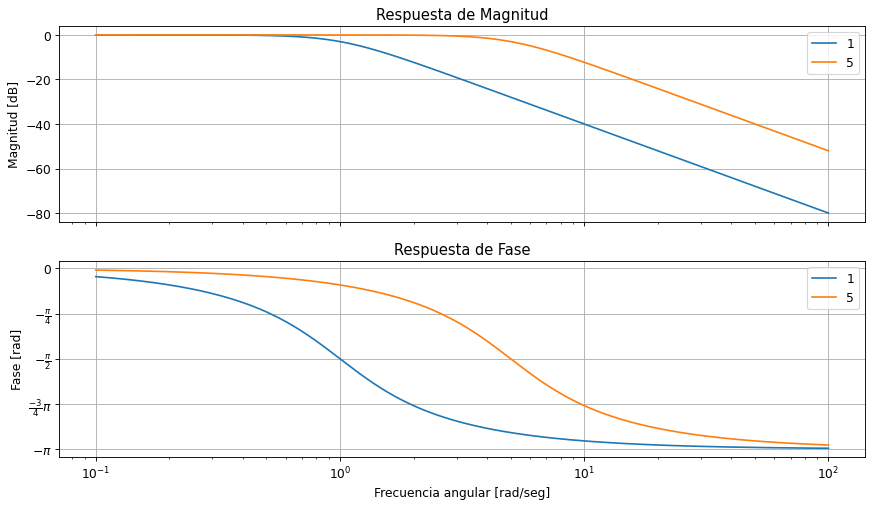

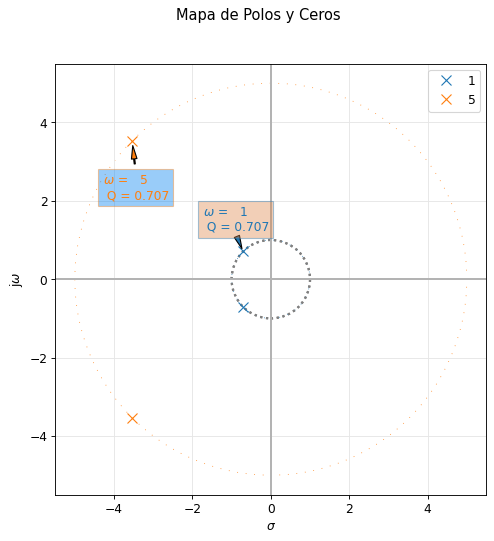

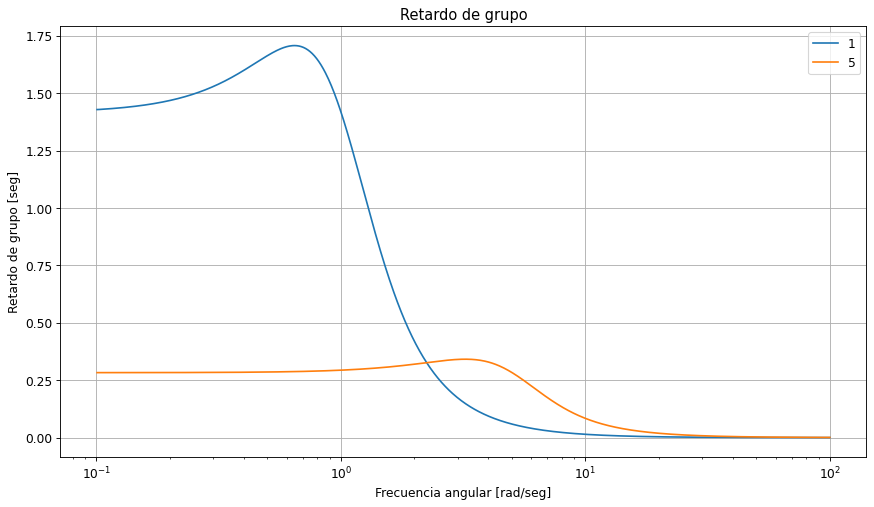

In [3]:

        
all_sos = []
all_values = [1, 5]

for ii in all_values:
    
    wo = ii
    qq = np.sqrt(2)/2 
    
    num = np.array([wo**2]) 
    den = np.array([1, wo/qq, wo**2])
    
    pretty_print_bicuad_omegayq(num,den)

    mi_sos = sig.TransferFunction(num,den)

    all_sos += [mi_sos]
    
plt.close('all')
_= analyze_sys(all_sos, sys_name=all_values)


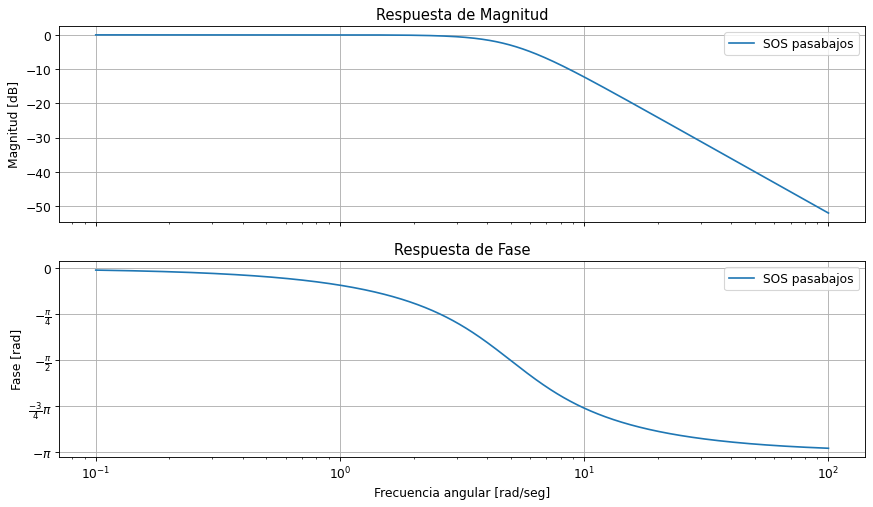

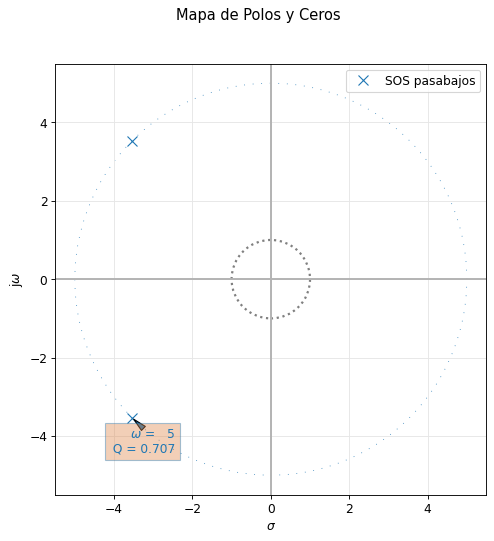

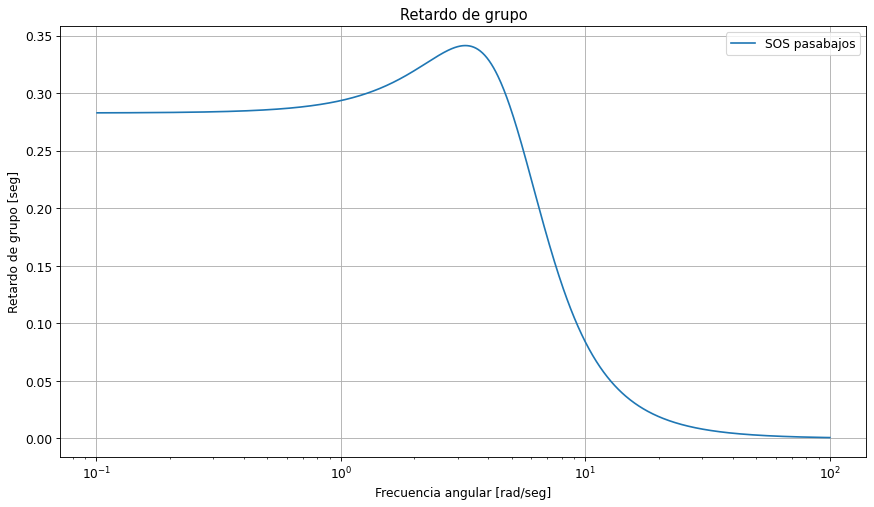

In [4]:
# Graficamos la respuesta en frecuencia para el modulo, la fase, el retardo de grupo 
# y finalmente el diagrama de polos y ceros

# second order system (SOS)
mi_sos = sig.TransferFunction(num,den)
    
_= analyze_sys(mi_sos, 'SOS pasabajos')


# Cosas para experimentar

 * El sobreimpulso de la función transferencia es apróximadamente $Q$ (Schaumann eq. 4.32).
 * La fase siempre arranca de 0, pasa por $-\pi/2$ y tiende asintóticamente a $-\pi$, independientemente de $Q$ (Schaumann eq. 4.33).
 * El parámetro $Q=\frac{1}{2\cos(\psi)}$ controla inversamente la cercanía de las singularidades al eje $j\omega$.
 * Para el caso normalizado, el lugar geométrico de los polos es la circunsferencia unitaria.
 * El cambio de $\omega_0$ no afecta la forma de las gráficas, sí la escala.